In [3]:
import requests
import io
import pandas as pd
from datetime import date

# today = "startDate=" + date.today().strftime("%Y-%m-%d")
today = "startDate=2022-10-13"
print(today)
ticker = input("Please specify ONE ticker to track: ") #decares stock ticker to track
token = "&token=6c67dc599e26dbdd802b077e38f2d55a559a6ad9" #api token! KEEP SAFE!

requestResponse = requests.get("https://api.tiingo.com/iex/" + ticker + "/prices?" + today + "&resampleFreq=1min" + token)
# requestResponse = requests.get("https://api.tiingo.com/iex/?tickers=aapl" + token)
data = pd.DataFrame(requestResponse.json()) #put pulled data into a pandas dataframe object

startDate=2022-10-13


In [70]:
data["bar"] = data["close"] - data["open"] #create candle stick from by taking (close - open)
data["fund"] = 100

In [84]:
log = open("price_log/" + date.today().strftime("%Y-%m-%d") + ".txt", "w+")

unit = 10 #unit of stock to buy (in dollars)
shares = [] #list to record all holdings
prev2 = data.iloc[0]["bar"] 
prev1 = data.iloc[1]["bar"]
for i in range(2, len(data)):
    data.iat[i, len(data.columns) - 1] = data.iat[i - 1, len(data.columns) - 1]
    curr = data.iloc[i]["bar"]
    for x in shares:
        if x < data.iloc[i]["low"]:
            data.iat[i, len(data.columns) - 1] += unit * data.iloc[i]["low"] / x
            log.write(data.iloc[i]["date"] + " Available funds: " + str(data.iloc[i]["fund"]) + "\n")
            log.write("Current shares: " + " ".join(str(x) for x in shares) + "\n")
            log.write(f"Sold {x:.2f}\n")
            log.write("\n")
            shares.remove(x)
    if data.iat[i, len(data.columns) - 1] > unit and prev2 < 0 and prev1 < 0 and curr < 0:
        log.write(data.iloc[i]["date"] + " Available funds: " + str(data.iloc[i]["fund"]) + "\n")
        log.write("Buying: " + str(data.iloc[i]["high"]) +  "\n")
        log.write("Current shares: " + " ".join(str(x) for x in shares) + "\n")
        log.write("\n")
        data.iat[i, len(data.columns) - 1] -= unit
        shares.append(data.iloc[i]["high"])
    prev2 = prev1
    prev1 = curr
log.write(f"End of day fund: {data.iat[len(data.index) - 1, len(data.columns) - 1]:.2f}\n")
log.close()


<AxesSubplot:xlabel='date'>

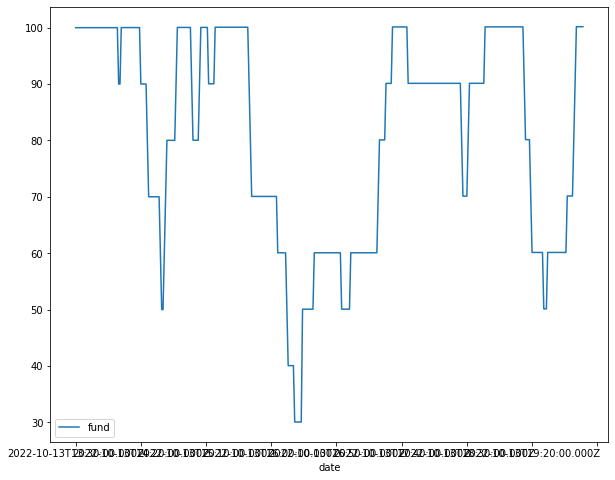

In [85]:
data.plot("date", "fund", figsize = (10, 8))